#Prepare Raw Data files and Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import itertools

# Get a bunch of tools from nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist

# Import bigrams
from nltk import bigrams

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
# Import Review Dataset
# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
# The chunk size specifies how many entries are read at a time
# The more data there is, the more advisable it is to increase the chunk size for faster processing
chunksize = 1000

# nrows (upper bound) should be more than the total number of rows in the whole file
for chunk in pd.read_json('drive/MyDrive/Colab Notebooks/Dataset/Video_Games_5.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

In [4]:
myData.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [5]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         497577 non-null  int64 
 1   verified        497577 non-null  bool  
 2   reviewTime      497577 non-null  object
 3   reviewerID      497577 non-null  object
 4   asin            497577 non-null  object
 5   reviewerName    497501 non-null  object
 6   reviewText      497419 non-null  object
 7   summary         497468 non-null  object
 8   unixReviewTime  497577 non-null  int64 
 9   vote            107793 non-null  object
 10  style           289237 non-null  object
 11  image           3634 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 42.2+ MB


In [6]:
# Import Meta Dataset
myList = []

chunksize = 1000

for chunk in pd.read_json('drive/MyDrive/Colab Notebooks/Dataset/meta_Video_Games.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myMeta = pd.concat(myList,axis=0)

In [7]:
myMeta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [8]:
myMeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84819 entries, 0 to 84818
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         84819 non-null  object
 1   tech1            84819 non-null  object
 2   description      84819 non-null  object
 3   fit              84819 non-null  object
 4   title            84819 non-null  object
 5   also_buy         84819 non-null  object
 6   tech2            84819 non-null  object
 7   brand            84819 non-null  object
 8   feature          84819 non-null  object
 9   rank             84819 non-null  object
 10  also_view        84819 non-null  object
 11  main_cat         84819 non-null  object
 12  similar_item     84819 non-null  object
 13  date             84819 non-null  object
 14  price            84819 non-null  object
 15  asin             84819 non-null  object
 16  imageURL         84819 non-null  object
 17  imageURLHighRes  84819 non-null

# 1st Cleaning Process

In [9]:
# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [10]:
# Define some functions for convenience

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

In [11]:
# Define some functions for convenience

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [12]:
# Generate a new column to store the compound scores

myData['sentiment_score'] = myData.apply(lambda x: getSentScore(x['clean_review']), axis=1)

In [13]:
# Generate a new column to store the compound scores

myData['sentiment_cat'] = myData.apply(lambda x: getSentCat(x['clean_review']), axis=1)

In [14]:
# Take a look
myData.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,clean_review,sentiment_score,sentiment_cat
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN,This game is a bit hard to get the hang of bu...,0.7543,positive
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN,I played it a while but it was alright The st...,0.8302,positive
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN,ok game,0.2960,positive
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN,found the game a bit too complicated not what...,0.3400,positive
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN,great game I love it and have played it since...,0.8934,positive


In [15]:
# new data frame which has date and year
new_myData = myData["reviewTime"].str.split(",", n = 1, expand = True)

# making separate date column from new data frame
myData["date"]= new_myData[0]

# making separate year column from new data frame
myData["year"]= new_myData[1]

#myData = myData.drop(['reviewTime'], axis=1)
myData.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,clean_review,sentiment_score,sentiment_cat,date,year
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN,This game is a bit hard to get the hang of bu...,0.7543,positive,10 17,2015
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN,I played it a while but it was alright The st...,0.8302,positive,07 27,2015
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN,ok game,0.2960,positive,02 23,2015
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN,found the game a bit too complicated not what...,0.3400,positive,02 20,2015
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN,great game I love it and have played it since...,0.8934,positive,12 25,2014


In [16]:
# Splitting the date
new_myData2 = myData["date"].str.split(" ", n = 1, expand = True)

# adding month to the main dataset
myData["month"]= new_myData2[0]

# adding day to the main dataset
myData["day"]= new_myData2[1]

myData = myData.drop(['date'], axis=1)
myData.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,clean_review,sentiment_score,sentiment_cat,year,month,day
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN,This game is a bit hard to get the hang of bu...,0.7543,positive,2015,10,17
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN,I played it a while but it was alright The st...,0.8302,positive,2015,07,27
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN,ok game,0.2960,positive,2015,02,23
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN,found the game a bit too complicated not what...,0.3400,positive,2015,02,20
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN,great game I love it and have played it since...,0.8934,positive,2014,12,25


In [17]:
# Drop some columns in myData that will not be used
myData = myData.drop(['reviewerID', 'reviewerName', 'reviewText', 'unixReviewTime', 'vote', 'style', 'image', 'reviewTime'], axis=1)
myData.head()

,overall,verified,asin,summary,clean_review,sentiment_score,sentiment_cat,year,month,day
0,5,True,0700026657,but when you do it's great.,This game is a bit hard to get the hang of bu...,0.7543,positive,2015,10,17
1,4,False,0700026657,"But in spite of that it was fun, I liked it",I played it a while but it was alright The st...,0.8302,positive,2015,07,27
2,3,True,0700026657,Three Stars,ok game,0.2960,positive,2015,02,23
3,2,True,0700026657,Two Stars,found the game a bit too complicated not what...,0.3400,positive,2015,02,20
4,5,True,0700026657,love this game,great game I love it and have played it since...,0.8934,positive,2014,12,25


In [18]:
# Drop some columns in myMeta that will not be used
myMeta = myMeta.drop(['tech1', 'fit', 'tech2', 'similar_item', 'date', 'imageURL', 'imageURLHighRes', 'details'], axis=1)
myMeta.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin
0,"[Video Games, PC, Games]",[],Reversi Sensory Challenger,[],Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,0042000742
1,"[Video Games, Xbox 360, Games, </span></span><...",[Brand new sealed!],Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343
2,"[Video Games, Retro Gaming & Microconsoles, Su...",[],street fighter 2 II turbo super nintendo snes ...,[],Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,$0.72,0276425316
3,"[Video Games, Xbox 360, Accessories, Controlle...",[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,Xbox 360 MAS STICK,[],by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,0324411812
4,"[Video Games, PC, Games, </span></span></span>...","[Phonics Alive! 3, The Speller teaches student...",Phonics Alive! 3: The Speller,[],by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,0439335310


#Join two dataframes & 2nd Cleaning Process

In [19]:
# Join myData and myMeta together on asin column using inner join
merged_data = pd.merge(myMeta, myData, on='asin')
merged_data.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,overall,verified,summary,clean_review,sentiment_score,sentiment_cat,year,month,day
0,"[Video Games, PC, Games]",[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,Anno 2070,[],Ubisoft,[A new era: while adhering to the fundamentals...,"[>#30,230 in Video Games (See Top 100 in Video...","[B013F0IP1C, B00JDP1AWU, B00XR3YC2E, B001AWMCM...",Video Games,$7.95,0700026657,5,True,but when you do it's great.,This game is a bit hard to get the hang of bu...,0.7543,positive,2015,10,17
1,"[Video Games, PC, Games]",[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,Anno 2070,[],Ubisoft,[A new era: while adhering to the fundamentals...,"[>#30,230 in Video Games (See Top 100 in Video...","[B013F0IP1C, B00JDP1AWU, B00XR3YC2E, B001AWMCM...",Video Games,$7.95,0700026657,4,False,"But in spite of that it was fun, I liked it",I played it a while but it was alright The st...,0.8302,positive,2015,07,27
2,"[Video Games, PC, Games]",[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,Anno 2070,[],Ubisoft,[A new era: while adhering to the fundamentals...,"[>#30,230 in Video Games (See Top 100 in Video...","[B013F0IP1C, B00JDP1AWU, B00XR3YC2E, B001AWMCM...",Video Games,$7.95,0700026657,3,True,Three Stars,ok game,0.2960,positive,2015,02,23
3,"[Video Games, PC, Games]",[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,Anno 2070,[],Ubisoft,[A new era: while adhering to the fundamentals...,"[>#30,230 in Video Games (See Top 100 in Video...","[B013F0IP1C, B00JDP1AWU, B00XR3YC2E, B001AWMCM...",Video Games,$7.95,0700026657,2,True,Two Stars,found the game a bit too complicated not what...,0.3400,positive,2015,02,20
4,"[Video Games, PC, Games]",[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,Anno 2070,[],Ubisoft,[A new era: while adhering to the fundamentals...,"[>#30,230 in Video Games (See Top 100 in Video...","[B013F0IP1C, B00JDP1AWU, B00XR3YC2E, B001AWMCM...",Video Games,$7.95,0700026657,5,True,love this game,great game I love it and have played it since...,0.8934,positive,2014,12,25


In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568986 entries, 0 to 568985
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   category         568986 non-null  object 
 1   description      568986 non-null  object 
 2   title            568986 non-null  object 
 3   also_buy         568986 non-null  object 
 4   brand            568986 non-null  object 
 5   feature          568986 non-null  object 
 6   rank             568986 non-null  object 
 7   also_view        568986 non-null  object 
 8   main_cat         568986 non-null  object 
 9   price            568986 non-null  object 
 10  asin             568986 non-null  object 
 11  overall          568986 non-null  int64  
 12  verified         568986 non-null  bool   
 13  summary          568864 non-null  object 
 14  clean_review     568986 non-null  object 
 15  sentiment_score  568986 non-null  float64
 16  sentiment_cat    568986 non-null  obje

In [21]:
# Make sure the column 'brand' is of string type
merged_data['brand'] = merged_data['brand'].apply(str)
# Remove leading and trailing whitespaces
merged_data['brand'] = merged_data['brand'].str.replace('\n', '').str.strip()
# Remove 'by ' in the sentences
merged_data['brand'] = merged_data['brand'].str.replace("by ", "")

#Filter Sony and Nintendo Brands

In [22]:
# Filter brand column by selecting only Sony and Nintendo
Sony_Nintendo = merged_data[(merged_data['brand'] == 'Sony') | (merged_data['brand'] == 'Nintendo')]
Sony_Nintendo.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,overall,verified,summary,clean_review,sentiment_score,sentiment_cat,year,month,day
558,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,5,True,Combining the flying action of Star Fox 64 and...,Forsaken is one of those games that you nev...,0.9908,positive,2012,06,27
559,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,4,False,It's been a while...,This game was a blast At least years ago fo...,0.9398,positive,2008,05,19
560,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,1,True,forsaken 64,very boring game The graphics are the averag...,0.5749,positive,2007,11,24
561,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,1,False,What Is This?,I think after buying this my wallet is Forsak...,-0.7845,negative,2001,12,5
562,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,3,False,Ive never gotten carsick from a video game before,I got this game at a great price and couldn't ...,0.8426,positive,2000,11,22


In [23]:
Sony_Nintendo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16836 entries, 558 to 563065
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         16836 non-null  object 
 1   description      16836 non-null  object 
 2   title            16836 non-null  object 
 3   also_buy         16836 non-null  object 
 4   brand            16836 non-null  object 
 5   feature          16836 non-null  object 
 6   rank             16836 non-null  object 
 7   also_view        16836 non-null  object 
 8   main_cat         16836 non-null  object 
 9   price            16836 non-null  object 
 10  asin             16836 non-null  object 
 11  overall          16836 non-null  int64  
 12  verified         16836 non-null  bool   
 13  summary          16836 non-null  object 
 14  clean_review     16836 non-null  object 
 15  sentiment_score  16836 non-null  float64
 16  sentiment_cat    16836 non-null  object 
 17  year     

In [24]:
# Save file
#from google.colab import files

# Convert Dataframe to csv file & Download
#Sony_Nintendo.to_csv('Sony_Nintendo.csv', index=False, encoding = 'utf-8-sig')
#files.download('Sony_Nintendo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Check the distribution of each brand
Sony_Nintendo['brand'].value_counts()

Nintendo    12234
Sony         4602
Name: brand, dtype: int64

In [26]:
Sony_Nintendo.groupby(by='title').sum()

<ipython-input-26-d621c825b2f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sony_Nintendo.groupby(by='title').sum()


,overall,verified,sentiment_score
title,,,
MySims Kingdom (Nintendo DS),35,7,3.6464
007 The World is Not Enough,314,20,45.8396
1080 Snowboarding,98,12,13.4155
3DS XL Retro NES Edition System,83,11,11.9445
3rd Super Robot Wars Z Zigokuhen [Japan Import],29,6,2.7226
...,...,...,...
amiibo Rosetta &amp; Chiko (Rosalina &amp; Luna) - JAPANESE IMPORT,253,52,28.5302
amiibo Shizue [winter clothes (Animal Crossing series),51,9,5.1330
amiibo Totakeke (Animal Crossing series),29,6,4.5305


In [27]:
Sony_Nintendo.groupby(by='brand').sum()

<ipython-input-27-afb563293d10>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sony_Nintendo.groupby(by='brand').sum()


,overall,verified,sentiment_score
brand,,,
Nintendo,54803,7117,7569.2508
Sony,20219,2705,2525.1041


In [28]:
review = Sony_Nintendo.groupby(by=['title', 'brand']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying and reviewing the products'})
#review.to_csv('review.csv', index=True)

In [30]:
# Calculate the number of people buying and reviewing the products
num_buyers = Sony_Nintendo.groupby(by=['title', 'brand']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying and reviewing the products'})

# Calculate the percentage of people buying and reviewing the products by brand
total_by_brand = num_buyers.groupby('brand').sum()
num_buyers['Percentage of people buying and reviewing the products by brand'] = num_buyers.groupby('brand', group_keys=False)['The number of people buying and reviewing the products'].apply(lambda x: x / total_by_brand.loc[x.name, 'The number of people buying and reviewing the products'] * 100)
#num_buyers.to_csv('review2.csv', index=True)

In [31]:
Sony_Nintendo.groupby(by=['title', 'brand', 'sentiment_score']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying and reviewing the products'})

The number of people buying and reviewing the products
title                                              brand    sentiment_score                                                        
DualShock 4 Wireless Controller for PlayStation... Sony     0.0000                                                          55     
                                                            0.6249                                                          42     
PlayStation Vita Memory Card 64GB (PCH-Z641J)      Sony     0.0000                                                          37     
DualShock 4 Wireless Controller for PlayStation... Sony     0.4404                                                          34     
Killzone: Shadow Fall (PlayStation 4)              Sony     0.4404                                                          32     
...                                                                                                                        ...     
Nintendo DSi XL - Midnight Blue                    Nintendo 0.8070                                                           1     
                                                            0.8020                                                           1     
                                                            0.7935                                                           1     
                                                            0.7430                                                           1     
inFamous First Light - PS4 (Physical Version)      Sony     0.9991                                                           1     

[9929 rows x 1 columns]

#Visualisation of Sony and Nintendo

### Bar Chart: The most top 10 product of each brand

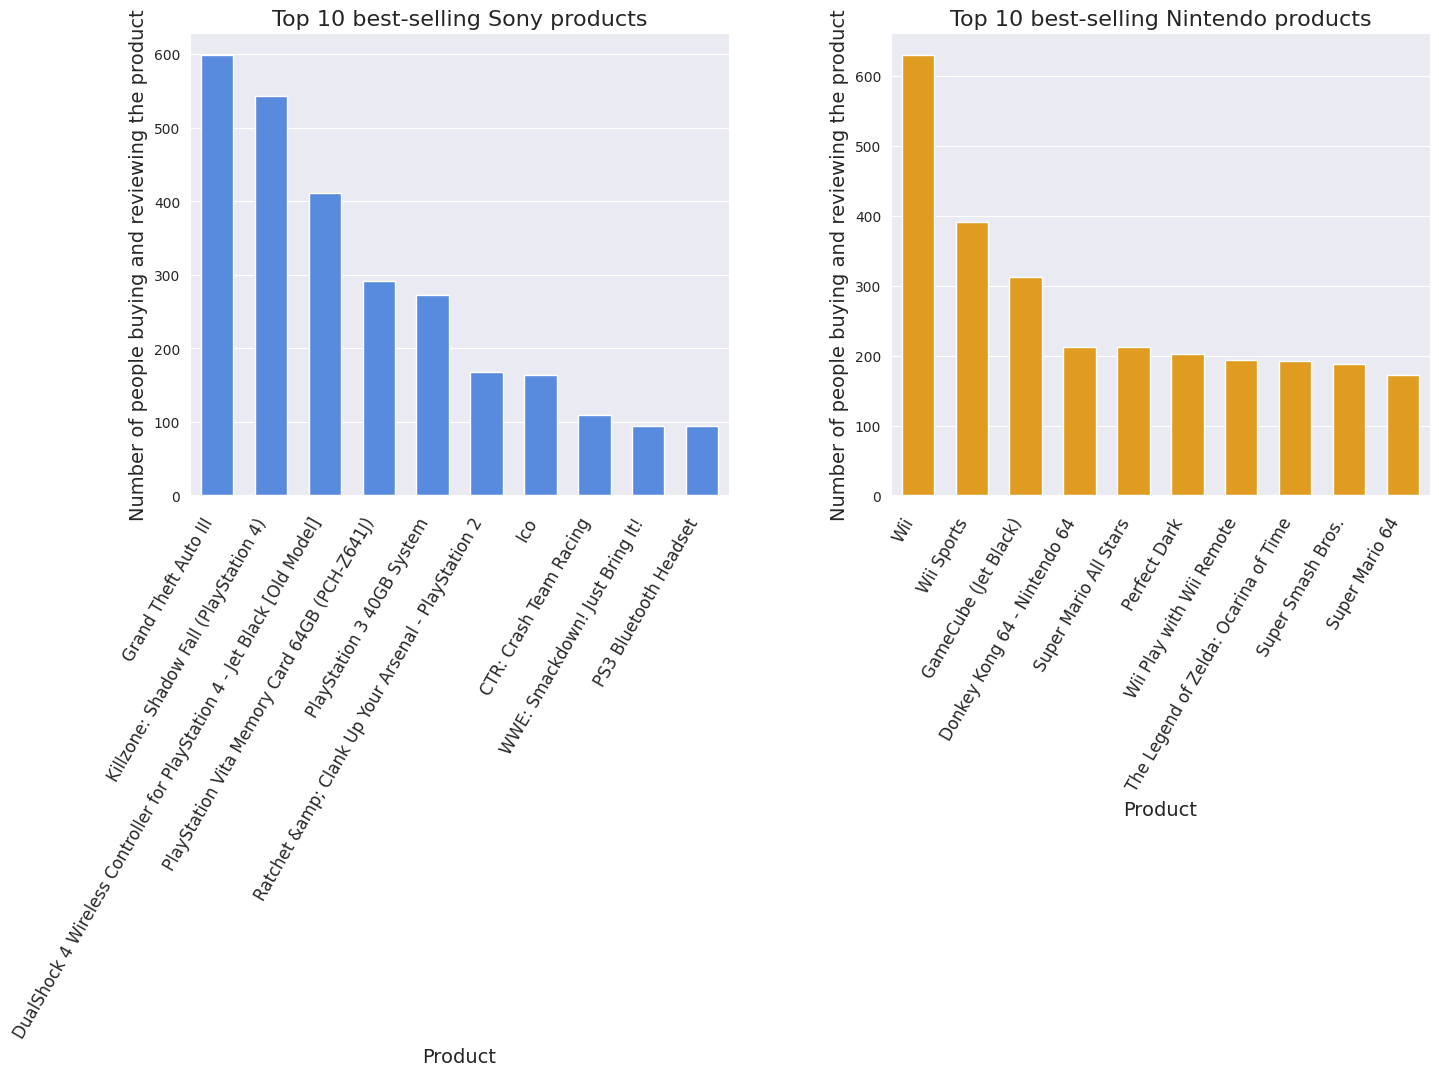

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# set the Seaborn style
sns.set_style("darkgrid")

# group the data by title and brand, and count the number of people buying the products
grouped_data = Sony_Nintendo.groupby(by=['title', 'brand']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying the products'})

# separate the data by brand
sony_data = grouped_data.loc[grouped_data.index.get_level_values('brand') == 'Sony']
nintendo_data = grouped_data.loc[grouped_data.index.get_level_values('brand') == 'Nintendo']

# select only the top 10 products for each brand
top_sony_products = sony_data.iloc[:10]
top_nintendo_products = nintendo_data.iloc[:10]

# reset the index to turn the groups into columns
top_sony_products = top_sony_products.reset_index()
top_nintendo_products = top_nintendo_products.reset_index()

# create the bar chart for Sony products using Seaborn
plt.figure(figsize=(16, 6))  # set the figure size to 16 inches by 6 inches
plt.subplots_adjust(wspace=0.3)  # adjust the spacing between subplots

# create the first subplot for Sony products
plt.subplot(1, 2, 1)
sns.barplot(data=top_sony_products, x='title', y='The number of people buying the products', color='#4285F4', width=0.6, dodge=False, zorder=2)

# set the chart title and axes labels
plt.title('Top 10 best-selling Sony products', fontsize=16)
plt.xlabel('Product', fontsize=14, fontfamily='sans-serif')
plt.ylabel('Number of people buying and reviewing the product', fontsize=14, fontfamily='sans-serif')

# set the x-axis tick labels to align with the center of the bars
plt.xticks(rotation=60, fontsize=12, fontfamily='sans-serif', ha='right')
plt.tick_params(axis='x', which='major', pad=10)

# create the second subplot for Nintendo products
plt.subplot(1, 2, 2)
sns.barplot(data=top_nintendo_products, x='title', y='The number of people buying the products', color='#FFA500', width=0.6, dodge=False, zorder=2)

# set the chart title and axes labels
plt.title('Top 10 best-selling Nintendo products', fontsize=16)
plt.xlabel('Product', fontsize=14, fontfamily='sans-serif')
plt.ylabel('Number of people buying and reviewing the product', fontsize=14, fontfamily='sans-serif')

# set the x-axis tick labels to align with the center of the bars
plt.xticks(rotation=60, fontsize=12, fontfamily='sans-serif', ha='right')
plt.tick_params(axis='x', which='major', pad=10)

# show the chart
plt.show()


###Sentiment Distribution (Sony vs Nintendo products)

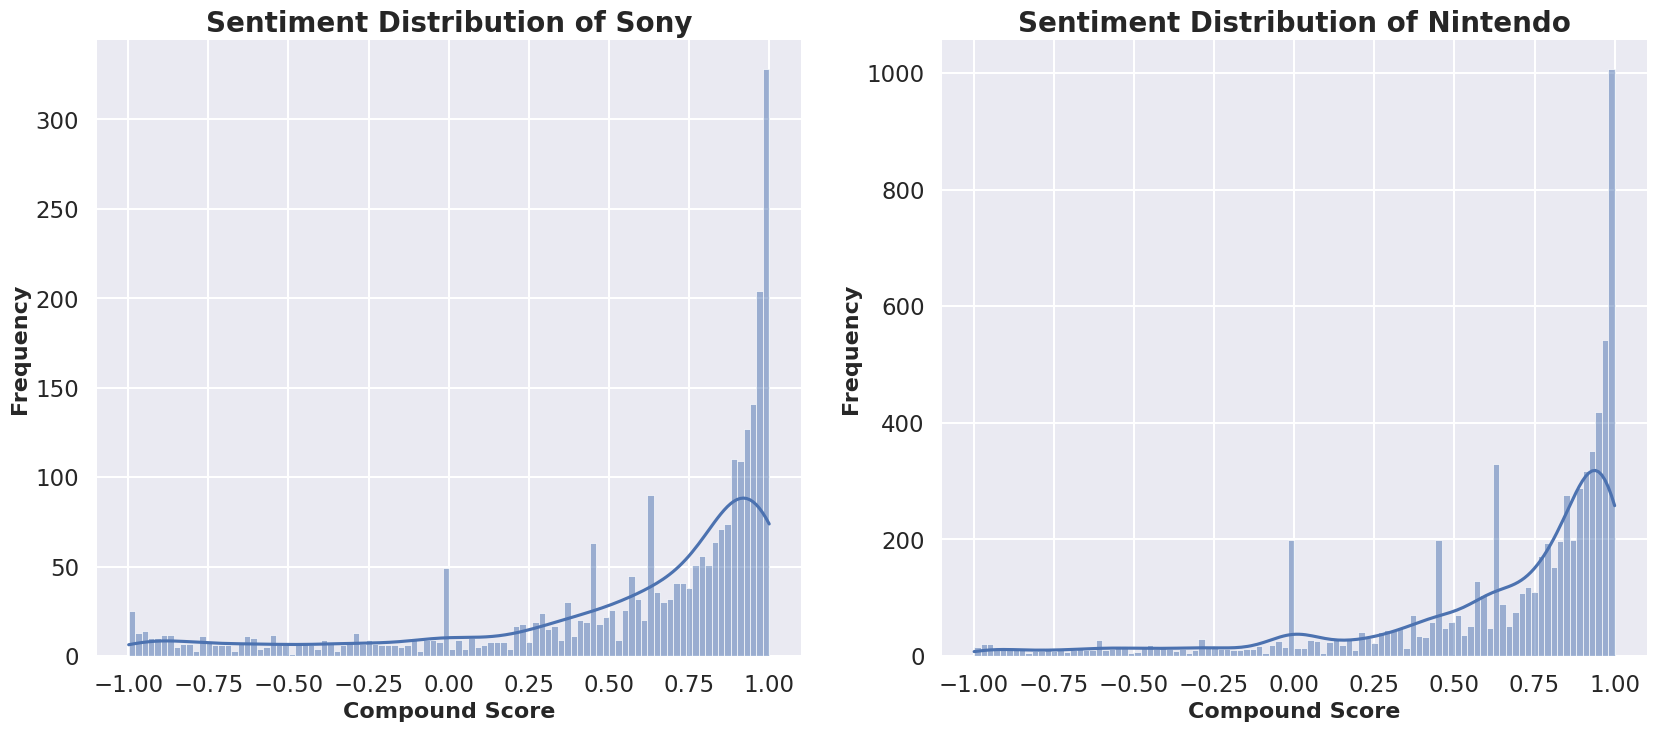

In [34]:
# Set a more specific style
sns.set_theme(style="darkgrid", context="talk")

# Set up the matplotlib figure for both plots
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# group the data by title and brand, and count the number of people buying the products
grouped_data2 = Sony_Nintendo.groupby(by=['title', 'brand','sentiment_score']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying the products'})

# separate the data by brand
sony_data2 = grouped_data2.loc[grouped_data2.index.get_level_values('brand') == 'Sony']
nintendo_data2 = grouped_data2.loc[grouped_data2.index.get_level_values('brand') == 'Nintendo']

# Use histplot for Sony data
sns.histplot(x="sentiment_score",
             data=sony_data2,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax1
             )

# Add label to horizontal axis
ax1.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax1.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax1.set_title("Sentiment Distribution of Sony", fontsize=20, fontweight='bold')

# Use histplot for Nintendo data
sns.histplot(x="sentiment_score",
             data=nintendo_data2,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax2
             )

# Add label to horizontal axis
ax2.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax2.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax2.set_title("Sentiment Distribution of Nintendo", fontsize=20, fontweight='bold')

# Remove the border line for both plots
sns.despine(left=True, bottom=True, ax=ax1)
sns.despine(left=True, bottom=True, ax=ax2)

# Save the figure
#plt.savefig("sentDist_both.png", bbox_inches="tight", dpi=200)

# Show img
plt.show()

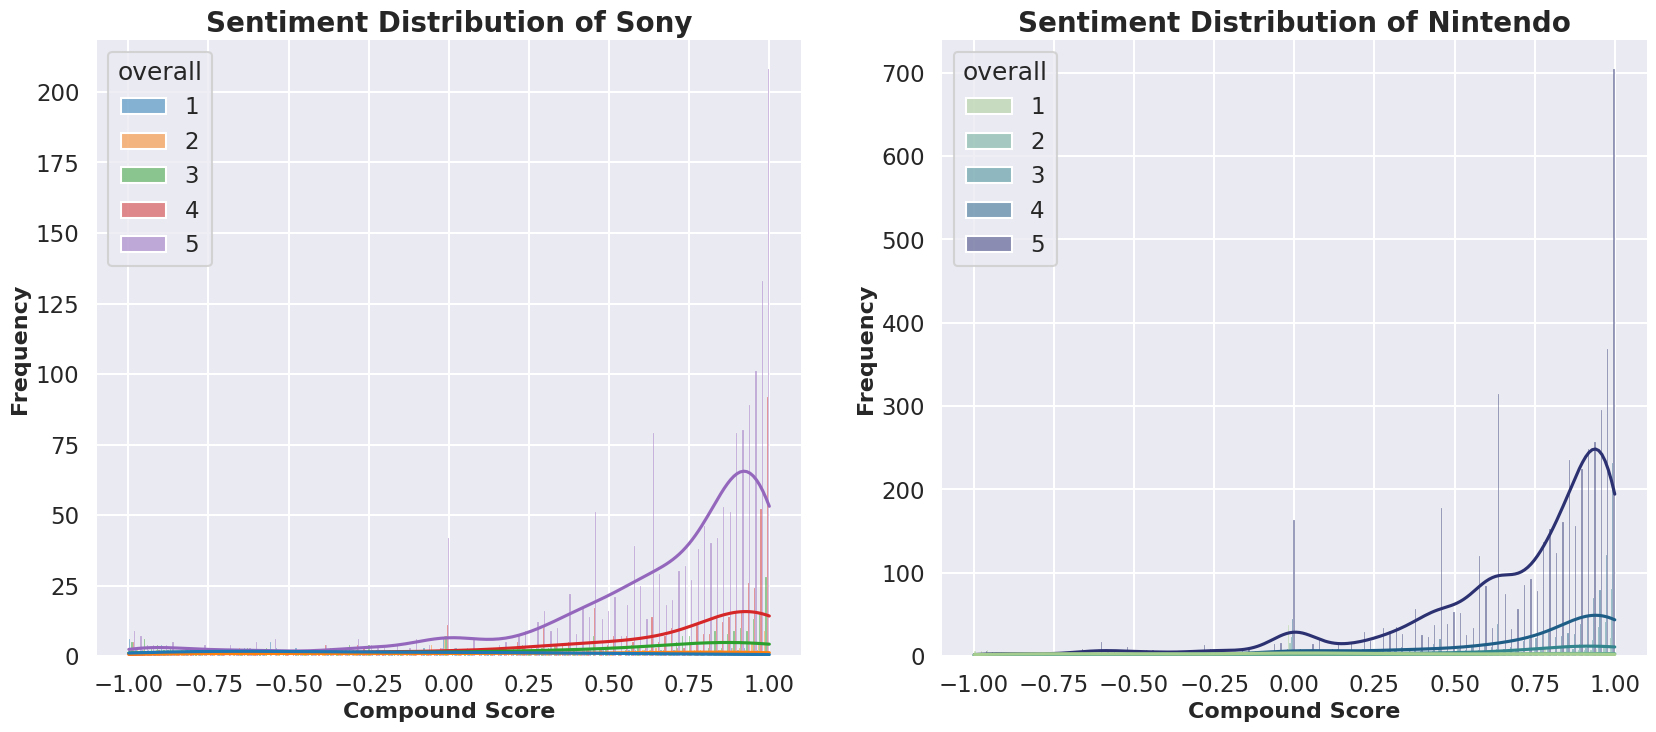

In [37]:
# Sentiment Distribution by Rating

# Set a more specific style
sns.set_theme(style="darkgrid", context="talk")

# Set up the matplotlib figure for both plots
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# group the data by title and brand, and count the number of people buying the products
grouped_data3 = Sony_Nintendo.groupby(by=['title', 'brand','sentiment_score', 'overall']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying the products'})

# separate the data by brand
sony_data3 = grouped_data3.loc[grouped_data3.index.get_level_values('brand') == 'Sony']
nintendo_data3 = grouped_data3.loc[grouped_data3.index.get_level_values('brand') == 'Nintendo']

# Use histplot for Sony data
sns.histplot(x="sentiment_score",
             data=sony_data3,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             hue="overall",
             multiple="dodge",
             palette="tab10",
             ax=ax1
             )

# Add label to horizontal axis
ax1.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax1.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax1.set_title("Sentiment Distribution of Sony", fontsize=20, fontweight='bold')

# Use histplot for Nintendo data
sns.histplot(x="sentiment_score",
             data=nintendo_data3,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             hue="overall",
             multiple="dodge",
             palette="crest",
             ax=ax2
             )

# Add label to horizontal axis
ax2.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax2.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax2.set_title("Sentiment Distribution of Nintendo", fontsize=20, fontweight='bold')

# Remove the border line for both plots
sns.despine(left=True, bottom=True, ax=ax1)
sns.despine(left=True, bottom=True, ax=ax2)

# Save the figure
#plt.savefig("sentDist_both.png", bbox_inches="tight", dpi=200)

# Show img
plt.show()


###Most Frequent Words (overall data of sony and Nintendo)

In [38]:
"""
Get the words for positive sentiment.

"""

# Subset the data
DataPos = Sony_Nintendo[Sony_Nintendo['sentiment_cat']=='positive']
# Take the reviews
ReviewPos = DataPos['clean_review']
# Make a single string
allReviewPos = ' '.join(ReviewPos)
# Break to words
WordsPos = word_tokenize(allReviewPos)
# Remove stopwords and cases
WordsPos_noSW_noCase = [word.lower() for word in WordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
freqDistPos = FreqDist(WordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
DFPos = pd.DataFrame(freqDistPos.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
StringPos = " ".join(WordsPos_noSW_noCase)

# Generate lists of bigrams for network visualisation
TokensPos = [word_tokenize(tweet) for tweet in DataPos['clean_review']]
TokensPos_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in TokensPos]
BigramPos = [list(bigrams(tweet)) for tweet in TokensPos_noSW_noCase]
BigramListPos = list(itertools.chain.from_iterable(BigramPos))
bigramFreqPos = FreqDist(BigramListPos)

In [39]:
"""
Get the words for neutral sentiment.

"""

# Subset the data
DataNeu = Sony_Nintendo[Sony_Nintendo['sentiment_cat']=='neutral']
# Take the reviews
ReviewNeu = DataNeu['clean_review']
# Make a single string
allReviewNeu = ' '.join(ReviewNeu)
# Break to words
WordsNeu = word_tokenize(allReviewNeu)
# Remove stopwords and cases
WordsNeu_noSW_noCase = [word.lower() for word in WordsNeu if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
freqDistNeu = FreqDist(WordsNeu_noSW_noCase)

# Convert the result to a dataframe for visualisation
DFNeu = pd.DataFrame(freqDistNeu.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
StringNeu = " ".join(WordsNeu_noSW_noCase)

# Generate lists of bigrams for network visualisation
TokensNeu = [word_tokenize(tweet) for tweet in DataNeu['clean_review']]
TokensNeu_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in TokensNeu]
BigramNeu = [list(bigrams(tweet)) for tweet in TokensNeu_noSW_noCase]
BigramListNeu = list(itertools.chain.from_iterable(BigramNeu))
bigramFreqNeu = FreqDist(BigramListNeu)

In [40]:
"""
Get the words for negative sentiment.

"""

# Subset the data
DataNeg = Sony_Nintendo[Sony_Nintendo['sentiment_cat']=='negative']
# Take the reviews
ReviewNeg = DataNeg['clean_review']
# Make a single string
allReviewNeg = ' '.join(ReviewNeg)
# Break to words
WordsNeg = word_tokenize(allReviewNeg)
# Remove stopwords and cases
WordsNeg_noSW_noCase = [word.lower() for word in WordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
freqDistNeg = FreqDist(WordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
DFNeg = pd.DataFrame(freqDistNeg.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
StringNeg = " ".join(WordsNeg_noSW_noCase)

# Generate lists of bigrams for network visualisation
TokensNeg = [word_tokenize(tweet) for tweet in DataNeg['clean_review']]
TokensNeg_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in TokensNeg]
BigramNeg = [list(bigrams(tweet)) for tweet in TokensNeg_noSW_noCase]
BigramListNeg = list(itertools.chain.from_iterable(BigramNeg))
bigramFreqNeg = FreqDist(BigramListNeg)

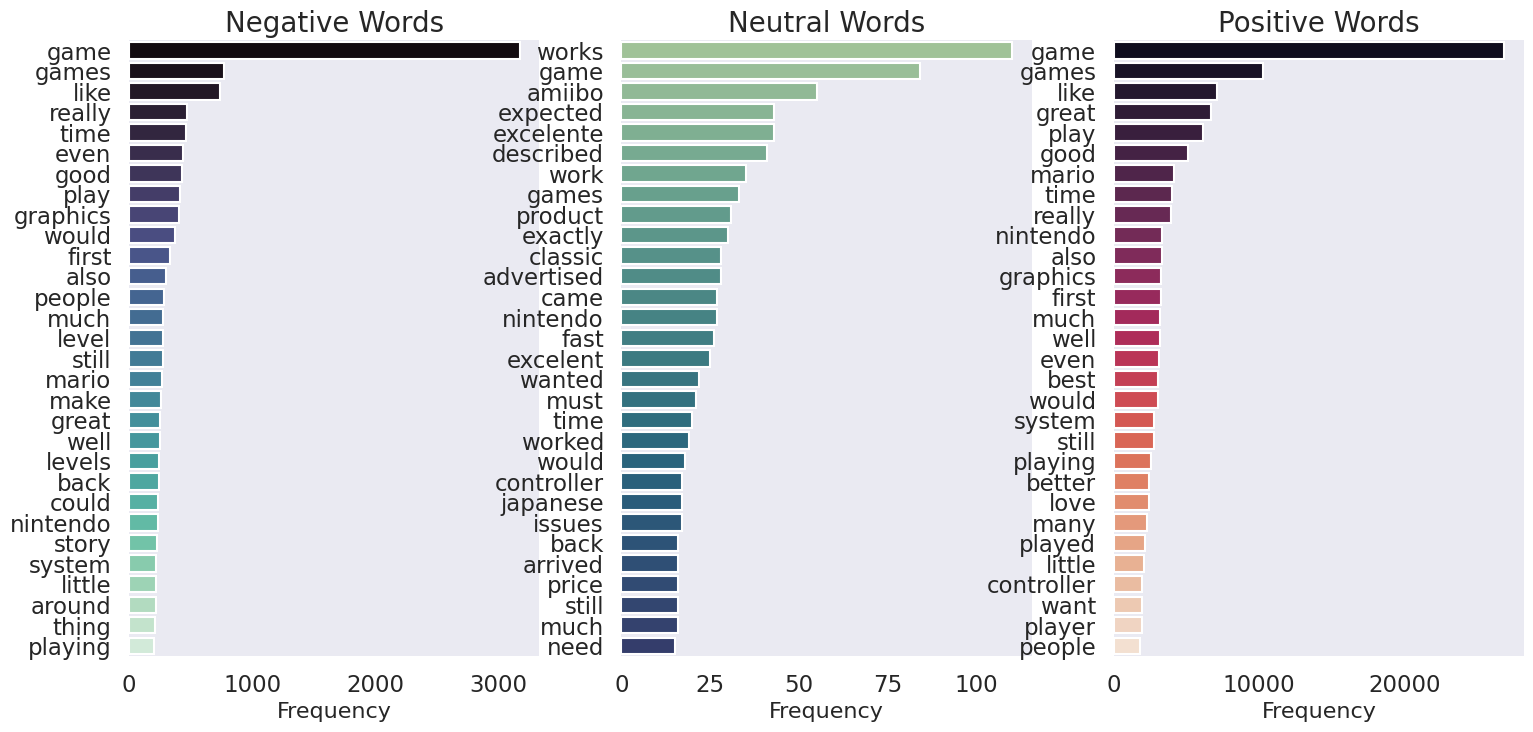

In [42]:
# Set a dark style
sns.set_style("dark")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 3, figsize=(18, 8))

# Barplot for negative reviews
sns.barplot(x="frequency",
            y="word",
            data=DFNeg,
            palette="mako",
            ax=ax[0],
            hue="word",
            dodge=False
            )

ax[0].set_title('Negative Words', fontsize=20)
ax[0].set_xlabel('Frequency', fontsize=16)
ax[0].set_ylabel('')

# Barplot for neutral reviews
sns.barplot(x="frequency",
            y="word",
            data=DFNeu,
            palette="crest",
            ax=ax[1],
            hue="word",
            dodge=False
            )

ax[1].set_title('Neutral Words', fontsize=20)
ax[1].set_xlabel('Frequency', fontsize=16)
ax[1].set_ylabel('')

# Barplot for positive reviews
sns.barplot(x="frequency",
            y="word",
            data = DFPos,
            palette="rocket",
            ax=ax[2],
            hue="word",
            dodge=False
            )

ax[2].set_title('Positive Words', fontsize=20)
ax[2].set_xlabel('Frequency', fontsize=16)
ax[2].set_ylabel('')

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png', bbox_inches='tight', dpi=400)

# Show img
plt.show()

###Bigram Network (overall data of sony and Nintendo)

In [43]:
# Prepare the bigram network
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# For positive reviews
# Collect the result
ResultPos = bigramFreqPos.most_common(50)
# Construct the network
G_Pos = nx.DiGraph()
# Create connections between nodes
for i in ResultPos:
    G_Pos.add_edge(i[0][0], i[0][1], weight=(i[1]))


# For negative reviews
# Collect the result
ResultNeg = bigramFreqNeg.most_common(50)
# Construct the network
G_Neg = nx.DiGraph()
# Create connections between nodes
for i in ResultNeg:
    G_Neg.add_edge(i[0][0], i[0][1], weight=(i[1]))


# For neutral reviews
# Collect the result
ResultNeu = bigramFreqNeu.most_common(50)
# Construct the network
G_Neu = nx.DiGraph()
# Create connections between nodes
for i in ResultNeu:
    G_Neu.add_edge(i[0][0], i[0][1], weight=(i[1]))

<ipython-input-45-5fe4751978d7>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  Pos_pos = graphviz_layout(G_Pos, prog="neato")
<ipython-input-45-5fe4751978d7>:29: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  Pos_neg = graphviz_layout(G_Neg, prog="neato")
<ipython-input-45-5fe4751978d7>:51: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  Pos_neu = graphviz_layout(G_Neu, prog="neato")


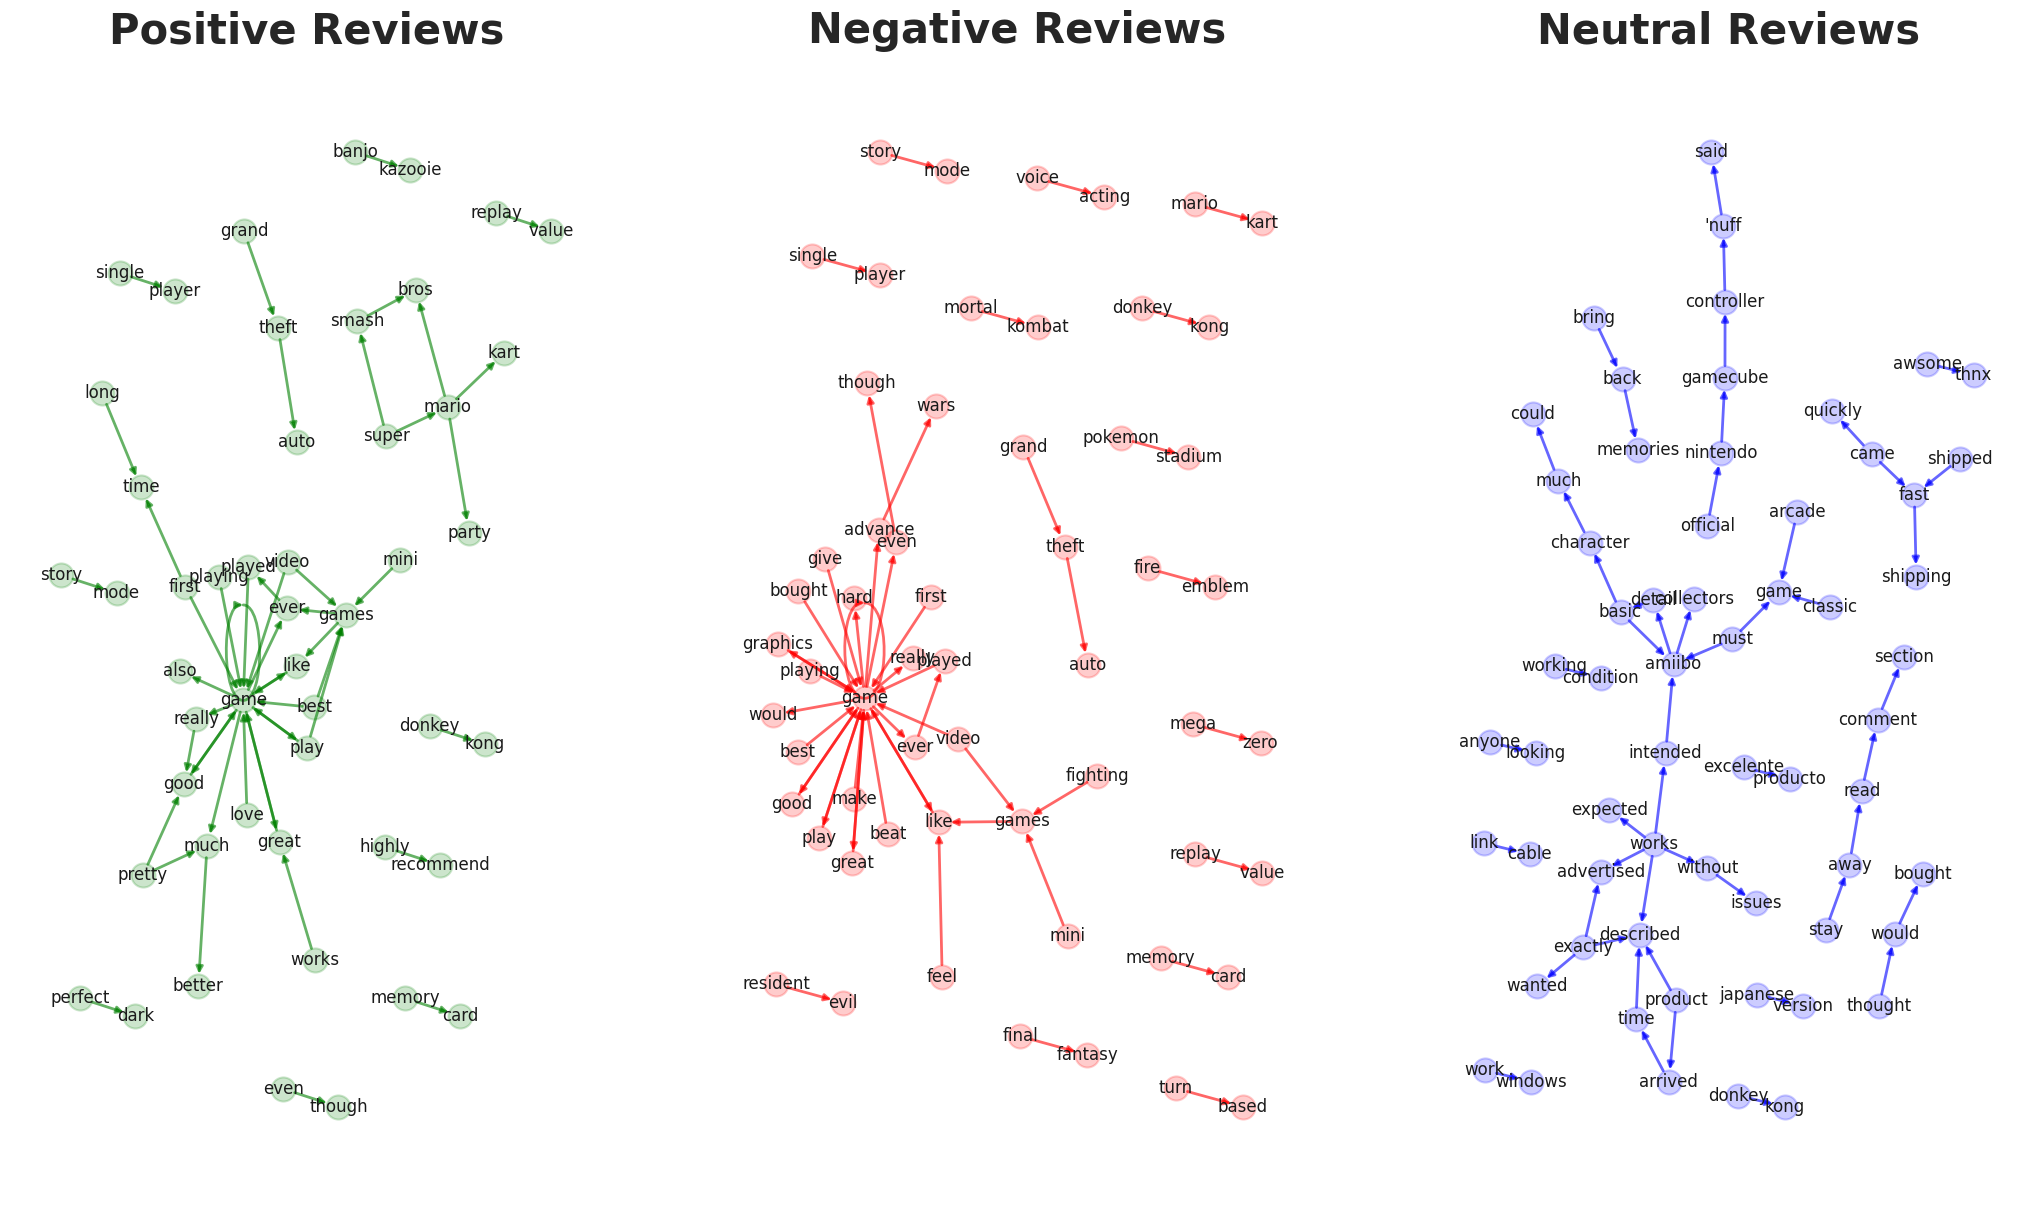

In [45]:
# Visualisation
# set up the figure
f, ax = plt.subplots(1, 3, figsize=(26, 15))

# For positive subplot
# use another layout
Pos_pos = graphviz_layout(G_Pos, prog="neato")

# store the node label information
Labels_pos = {}
for node in G_Pos.nodes:
    Labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_Pos, Pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_Pos, Pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_Pos, Pos_pos, Labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews',fontsize=30, fontweight='bold')

# For negative subplot
# use another layout
Pos_neg = graphviz_layout(G_Neg, prog="neato")

# store the node label information
Labels_neg = {}
for node in G_Neg.nodes:
    Labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_Neg, Pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_Neg, Pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_Neg, Pos_neg, Labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews',fontsize=30, fontweight='bold')

# For neutral subplot
# use another layout
Pos_neu = graphviz_layout(G_Neu, prog="neato")

# store the node label information
Labels_neu = {}
for node in G_Neu.nodes:
    Labels_neu[node] = node

# Plot edges
nx.draw_networkx_edges(G_Neu, Pos_neu, width=2, alpha=0.6, edge_color="blue", ax=ax[2])

# Plot nodes
nx.draw_networkx_nodes(G_Neu, Pos_neu, alpha=0.2, label=True, node_color="blue", ax=ax[2])

# Add labels
nx.draw_networkx_labels(G_Neu, Pos_neu, Labels_neu, ax=ax[2])

# Turn off the axis
ax[2].axis("off")
ax[2].set_title('Neutral Reviews',fontsize=30, fontweight='bold')

# Save the figure
plt.savefig('directedBigram.png', bbox_inches='tight', dpi=400)

# Show img
plt.show()

###Wordcloud (overall data of sony and Nintendo)

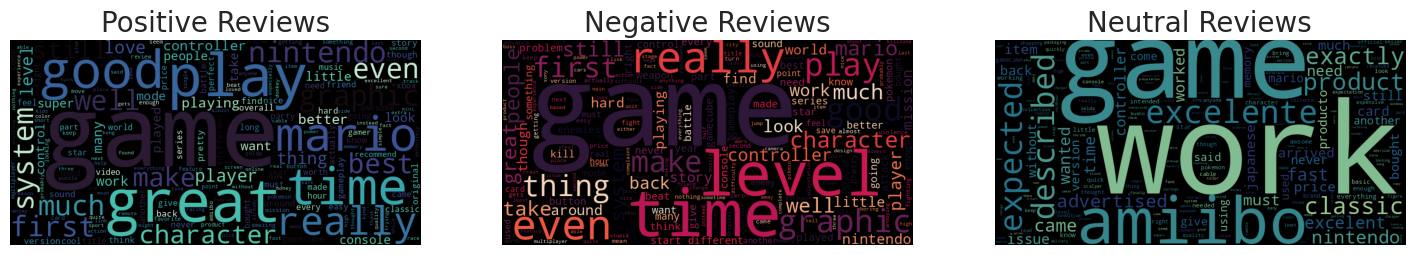

In [46]:
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(1, 3,
                     figsize=(18,6)
                     )

# Generate a word cloud for positive reviews
cloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='black',
                       colormap='mako'
                       ).generate(StringPos)

ax[0].imshow(cloudPos)
ax[0].set_title('Positive Reviews',fontsize=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].axis("off")

# Generate a word cloud for negative reviews
cloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='black',
                       colormap='rocket'
                       ).generate(StringNeg)

ax[1].imshow(cloudNeg)
ax[1].set_title('Negative Reviews',fontsize=20)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].axis("off")

# Generate a word cloud for neutral reviews
cloudNeu = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='black',
                       colormap='crest'
                       ).generate(StringNeu)

ax[2].imshow(cloudNeu)
ax[2].set_title('Neutral Reviews',fontsize=20)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show img
plt.show()

###Year vs Rating count (By Brand)
In this section, the number of reviews posted according to sentiments will be examined for each year spanning from 2000 to 2018.

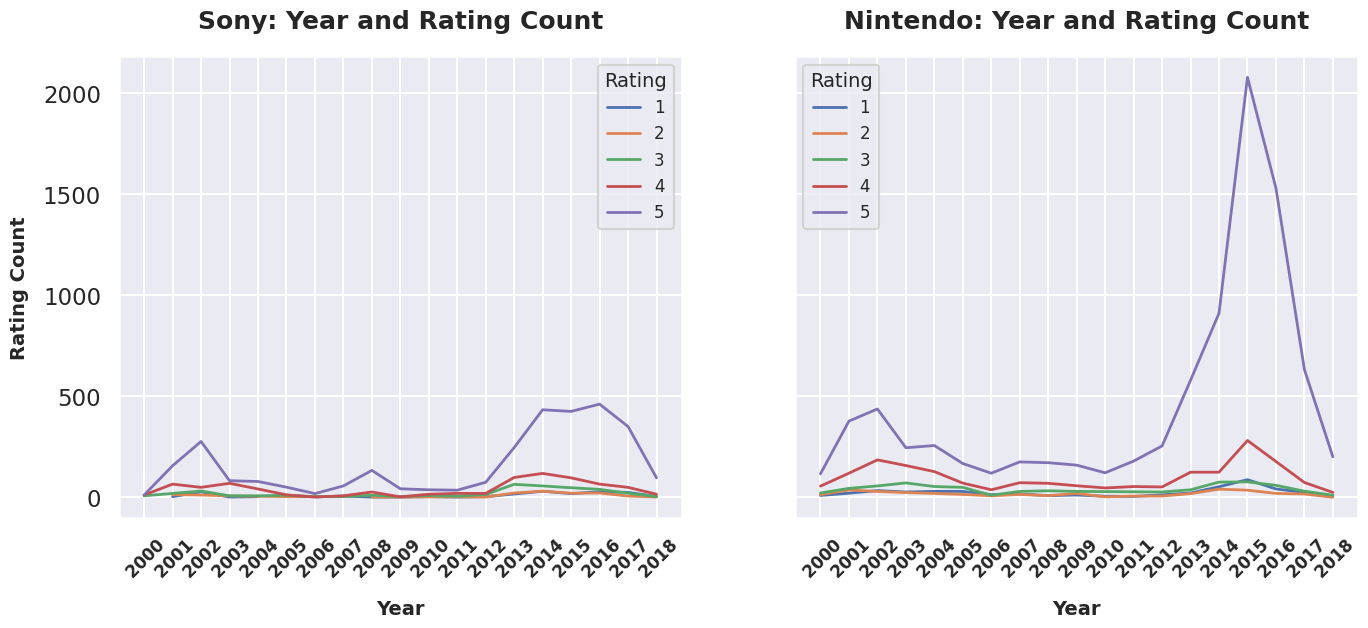

In [48]:
# Set the Seaborn style
sns.set_style('darkgrid')

# Separate the data by brand
sony_data = Sony_Nintendo.loc[Sony_Nintendo['brand'] == 'Sony']
nintendo_data = Sony_Nintendo.loc[Sony_Nintendo['brand'] == 'Nintendo']

# Group the data by year and rating, and count the number of ratings in each group
sony_rating_counts = sony_data.groupby(['year', 'overall'])['overall'].count().unstack()
nintendo_rating_counts = nintendo_data.groupby(['year', 'overall'])['overall'].count().unstack()

# Create the plot for Sony
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

sony_rating_counts.plot(ax=ax1, linewidth=2)
ax1.set_xticks(range(len(sony_rating_counts.index)))
ax1.set_xticklabels(sony_rating_counts.index, rotation=45, fontsize=12, fontweight='bold')
ax1.set_title('Sony: Year and Rating Count', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14, fontweight='bold', labelpad=10)
ax1.set_ylabel('Rating Count', fontsize=14, fontweight='bold', labelpad=10)
ax1.legend(title='Rating', fontsize=12, title_fontsize=14)

# Create the plot for Nintendo
nintendo_rating_counts.plot(ax=ax2, linewidth=2)
ax2.set_xticks(range(len(nintendo_rating_counts.index)))
ax2.set_xticklabels(nintendo_rating_counts.index, rotation=45, fontsize=12, fontweight='bold')
ax2.set_title('Nintendo: Year and Rating Count', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Rating Count', fontsize=14, fontweight='bold', labelpad=10)
ax2.legend(title='Rating', fontsize=12, title_fontsize=14)

# Show the plots
plt.show()


###Review Rating Distribution (By Brand)

In [50]:
import plotly.express as px
import plotly.io as pio

# define the color mapping
color_map = {'Sony': 'blue', 'Nintendo': 'red'}

fig = px.histogram(Sony_Nintendo, x='overall', nbins=8, color='brand', facet_col='brand',
                    color_discrete_map=color_map)  # pass the color mapping to the color_discrete_map parameter
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7)
fig.update_layout(
    title='Review Rating Distribution by Brand',
    xaxis_title='overll',
    yaxis_title='Count',
    font=dict(size=16, color='black'),
)

pio.show(fig)

In [51]:
# Count the ratings of each brand
Sony_Nintendo.groupby(['brand', 'overall'])['overall'].count()

brand     overall
Nintendo  1           464
          2           343
          3           781
          4          1920
          5          8726
Sony      1           187
          2           165
          3           376
          4           796
          5          3078
Name: overall, dtype: int64

In [52]:
# Survey dataframe again
Sony_Nintendo.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,overall,verified,summary,clean_review,sentiment_score,sentiment_cat,year,month,day
558,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,5,True,Combining the flying action of Star Fox 64 and...,Forsaken is one of those games that you nev...,0.9908,positive,2012,06,27
559,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,4,False,It's been a while...,This game was a blast At least years ago fo...,0.9398,positive,2008,05,19
560,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,1,True,forsaken 64,very boring game The graphics are the averag...,0.5749,positive,2007,11,24
561,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,1,False,What Is This?,I think after buying this my wallet is Forsak...,-0.7845,negative,2001,12,5
562,"[Video Games, Retro Gaming & Microconsoles, Ni...",[Cartridge and hard plastic collector case wit...,Forsaken,"[B00002STGL, B00002STGQ, B00000JMWB, B00000DMB...",Nintendo,[Nintendo],"[>#43,237 in Video Games (See Top 100 in Video...","[B00002STGL, B00000DMAT, B00000DMB3, B00000I1B...",Video Games,$49.99,B000006OWT,3,False,Ive never gotten carsick from a video game before,I got this game at a great price and couldn't ...,0.8426,positive,2000,11,22


###Filter Game Console of each brand


In [53]:
# Filter Game Consoles from each brand that are best-selling and have the most comments
GameConsole = merged_data[(merged_data['title'] == 'Wii') | (merged_data['title'] == 'PlayStation 3 40GB System')]
GameConsole.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,overall,verified,summary,clean_review,sentiment_score,sentiment_cat,year,month,day
157531,"[Video Games, Wii]",[The Wii console brings a revolution of intera...,Wii,"[B0017Q4DGI, B001GIUWX0, B004WLRR4K, B0186G8X1...",Nintendo,"[With motion-control technology, the gamer can...","[>#2,855 in Video Games (See Top 100 in Video ...","[B07G7G55W4, B07BZS1566, B00NKS059K, B009M72E5...",Video Games,$724.99,B0009VXBAQ,5,False,I finally got one through a connection,Hmm the connection lets just say its a goo...,0.9724,positive,2006,11,18
157532,"[Video Games, Wii]",[The Wii console brings a revolution of intera...,Wii,"[B0017Q4DGI, B001GIUWX0, B004WLRR4K, B0186G8X1...",Nintendo,"[With motion-control technology, the gamer can...","[>#2,855 in Video Games (See Top 100 in Video ...","[B07G7G55W4, B07BZS1566, B00NKS059K, B009M72E5...",Video Games,$724.99,B0009VXBAQ,5,False,Wii is the future,I love the wii The best games are Wii Sports ...,0.9831,positive,2006,08,28
157533,"[Video Games, Wii]",[The Wii console brings a revolution of intera...,Wii,"[B0017Q4DGI, B001GIUWX0, B004WLRR4K, B0186G8X1...",Nintendo,"[With motion-control technology, the gamer can...","[>#2,855 in Video Games (See Top 100 in Video ...","[B07G7G55W4, B07BZS1566, B00NKS059K, B009M72E5...",Video Games,$724.99,B0009VXBAQ,5,False,Innovative and priced to move!!!,For it is the best buy out there You a...,0.9988,positive,2006,04,28
157534,"[Video Games, Wii]",[The Wii console brings a revolution of intera...,Wii,"[B0017Q4DGI, B001GIUWX0, B004WLRR4K, B0186G8X1...",Nintendo,"[With motion-control technology, the gamer can...","[>#2,855 in Video Games (See Top 100 in Video ...","[B07G7G55W4, B07BZS1566, B00NKS059K, B009M72E5...",Video Games,$724.99,B0009VXBAQ,5,True,5 stars,exactly as expected no complaints,-0.5994,negative,2018,04,6
157535,"[Video Games, Wii]",[The Wii console brings a revolution of intera...,Wii,"[B0017Q4DGI, B001GIUWX0, B004WLRR4K, B0186G8X1...",Nintendo,"[With motion-control technology, the gamer can...","[>#2,855 in Video Games (See Top 100 in Video ...","[B07G7G55W4, B07BZS1566, B00NKS059K, B009M72E5...",Video Games,$724.99,B0009VXBAQ,5,True,"great game console, nintendo's original games ...",I really like the games from the WII and the w...,0.4201,positive,2018,04,2


In [55]:
# Count the number of each product
GameConsole['title'].value_counts()

Wii                          629
PlayStation 3 40GB System    272
Name: title, dtype: int64

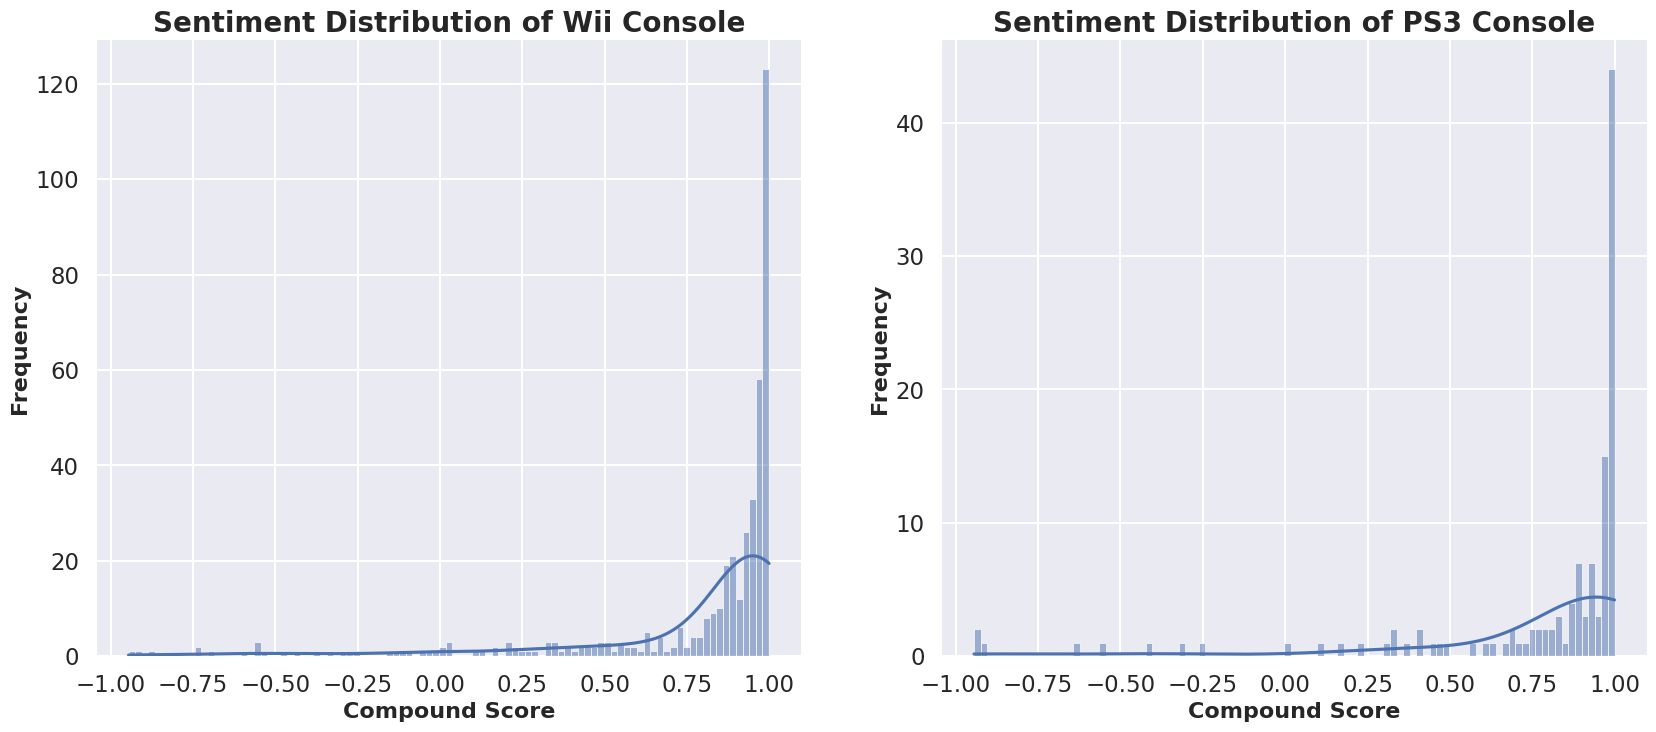

In [56]:
# Visualize the sentiment distribution curves of the top-rated product from each brand

# Set a more specific style
sns.set_theme(style="darkgrid", context="talk")

# Set up the matplotlib figure for both plots
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# group the data by title and brand, and count the number of people buying the products
grouped_data2 = Sony_Nintendo.groupby(by=['title', 'brand','sentiment_score']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying the products'})

# separate the data by brand
Wii_data = grouped_data2.loc[grouped_data2.index.get_level_values('title') == 'Wii']
PS3_data = grouped_data2.loc[grouped_data2.index.get_level_values('title') == 'PlayStation 3 40GB System']

# Use histplot for Wii data
sns.histplot(x="sentiment_score",
             data = Wii_data,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax1
             )

# Add label to horizontal axis
ax1.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax1.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax1.set_title("Sentiment Distribution of Wii Console", fontsize=20, fontweight='bold')

# Use histplot for Nintendo data
sns.histplot(x="sentiment_score",
             data = PS3_data,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax2
             )

# Add label to horizontal axis
ax2.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax2.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax2.set_title("Sentiment Distribution of PS3 Console", fontsize=20, fontweight='bold')

# Remove the border line for both plots
sns.despine(left=True, bottom=True, ax=ax1)
sns.despine(left=True, bottom=True, ax=ax2)

# Save the figure
#plt.savefig("sentDist_both.png", bbox_inches="tight", dpi=200)

# Show the figure in the notebook
plt.show()

###Filter Game of each brand

In [58]:
#Filter Game of each brand that are best-selling and have the most comments
Game = merged_data[(merged_data['title'] == 'Wii Sports') | (merged_data['title'] == 'Grand Theft Auto III')]
Game.head()

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,overall,verified,summary,clean_review,sentiment_score,sentiment_cat,year,month,day
67379,"[Video Games, Retro Gaming & Microconsoles, Pl...",[Grand Theft Auto III],Grand Theft Auto III,"[B0000696CZ, B0001VGFK2, B01L1P49OA, B00006BXB...",Sony,[Sony Playstion 2 Grand Theft auto],"[>#5,281 in Video Games (See Top 100 in Video ...","[B0000696CZ, B0001VGFK2, B00006BXBV, B000KCX9M...",Video Games,$6.66,B00005O0I2,5,False,Here We Go!,This Series is the REASON i'm a Gamer Freed...,0.9910,positive,2001,10,14
67380,"[Video Games, Retro Gaming & Microconsoles, Pl...",[Grand Theft Auto III],Grand Theft Auto III,"[B0000696CZ, B0001VGFK2, B01L1P49OA, B00006BXB...",Sony,[Sony Playstion 2 Grand Theft auto],"[>#5,281 in Video Games (See Top 100 in Video ...","[B0000696CZ, B0001VGFK2, B00006BXBV, B000KCX9M...",Video Games,$6.66,B00005O0I2,4,True,Good Price for A Good Game,Good game Has an occasional minor bug where y...,0.2382,positive,2017,09,15
67381,"[Video Games, Retro Gaming & Microconsoles, Pl...",[Grand Theft Auto III],Grand Theft Auto III,"[B0000696CZ, B0001VGFK2, B01L1P49OA, B00006BXB...",Sony,[Sony Playstion 2 Grand Theft auto],"[>#5,281 in Video Games (See Top 100 in Video ...","[B0000696CZ, B0001VGFK2, B00006BXBV, B000KCX9M...",Video Games,$6.66,B00005O0I2,5,True,Five Stars,Awesome,0.6249,positive,2017,08,12
67382,"[Video Games, Retro Gaming & Microconsoles, Pl...",[Grand Theft Auto III],Grand Theft Auto III,"[B0000696CZ, B0001VGFK2, B01L1P49OA, B00006BXB...",Sony,[Sony Playstion 2 Grand Theft auto],"[>#5,281 in Video Games (See Top 100 in Video ...","[B0000696CZ, B0001VGFK2, B00006BXBV, B000KCX9M...",Video Games,$6.66,B00005O0I2,5,True,Nostalgia,Disc was in excellent condition Happy with my...,0.8126,positive,2017,05,1
67383,"[Video Games, Retro Gaming & Microconsoles, Pl...",[Grand Theft Auto III],Grand Theft Auto III,"[B0000696CZ, B0001VGFK2, B01L1P49OA, B00006BXB...",Sony,[Sony Playstion 2 Grand Theft auto],"[>#5,281 in Video Games (See Top 100 in Video ...","[B0000696CZ, B0001VGFK2, B00006BXBV, B000KCX9M...",Video Games,$6.66,B00005O0I2,3,False,NOT GREATEST HITS EDITION,The game is great and we all know that I ord...,0.8608,positive,2017,04,22


In [59]:
# Count the number of each game
Game['title'].value_counts()

Grand Theft Auto III    598
Wii Sports              391
Name: title, dtype: int64

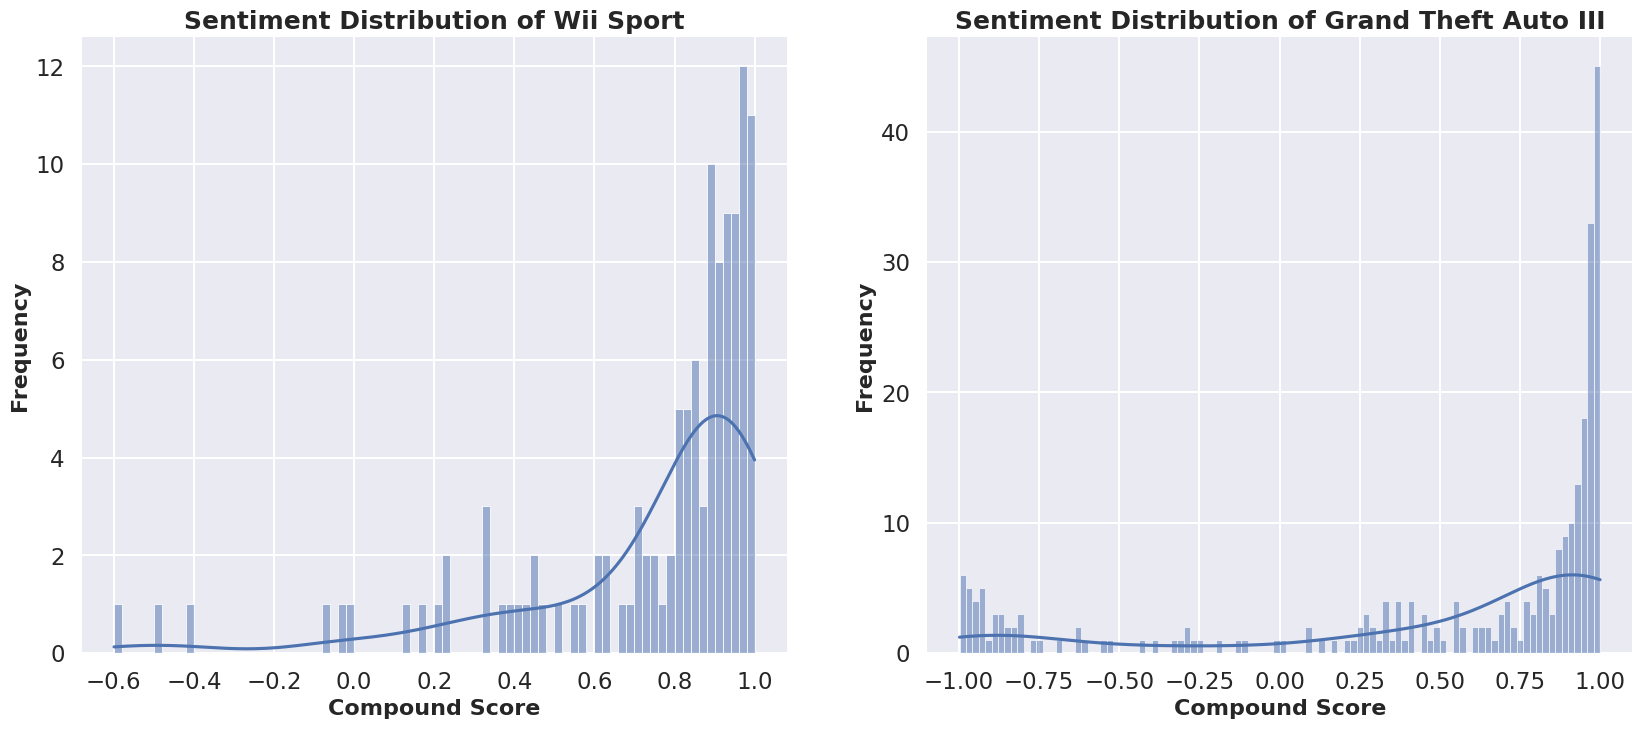

In [60]:
# Visualize the sentiment distribution curves of the top-rated game from each brand

# Set a more specific style
sns.set_theme(style="darkgrid", context="talk")

# Set up the matplotlib figure for both plots
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# group the data by title and brand, and count the number of people buying the products
grouped_data2 = Sony_Nintendo.groupby(by=['title', 'brand','sentiment_score']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'The number of people buying the products'})

# separate the data by brand
WillSport_data = grouped_data2.loc[grouped_data2.index.get_level_values('title') == 'Wii Sports']
GTA3_data = grouped_data2.loc[grouped_data2.index.get_level_values('title') == 'Grand Theft Auto III']

# Use histplot for Wii data
sns.histplot(x="sentiment_score",
             data = WillSport_data,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax1
             )

# Add label to horizontal axis
ax1.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax1.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax1.set_title("Sentiment Distribution of Wii Sport", fontsize=18, fontweight='bold')

# Use histplot for Nintendo data
sns.histplot(x="sentiment_score",
             data = GTA3_data,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax2
             )

# Add label to horizontal axis
ax2.set_xlabel("Compound Score", fontsize=16, fontweight='bold')

# Add ylabel
ax2.set_ylabel("Frequency", fontsize=16, fontweight='bold')

# Add a title
ax2.set_title("Sentiment Distribution of Grand Theft Auto III", fontsize=18, fontweight='bold')

# Remove the border line for both plots
sns.despine(left=True, bottom=True, ax=ax1)
sns.despine(left=True, bottom=True, ax=ax2)

# Save the figure
#plt.savefig("sentDist_both.png", bbox_inches="tight", dpi=200)

# Show the figure in the notebook
plt.show()